# CAPM - Capital Asset Pricing Model

In [1]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

In [2]:
spy_etf = web.DataReader('SPY', 'stooq')

In [3]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-12-26 to 2014-12-29
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [4]:
spy_etf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-26,321.65,322.950,321.640,322.94,31024188
2019-12-24,321.47,321.520,320.900,321.23,20270007
2019-12-23,321.59,321.650,321.060,321.22,53015641
2019-12-20,320.46,321.974,319.387,320.73,149338215
2019-12-19,319.80,320.980,319.525,320.90,85388424


In [5]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-18')

In [6]:
aapl = web.DataReader('AAPL', 'stooq', start=start, end=end)
# datetime is not working , damn

In [7]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-26,284.82,289.98,284.700,289.91,23334004
2019-12-24,284.69,284.89,282.920,284.27,12119714
2019-12-23,280.53,284.25,280.374,284.00,24677883
2019-12-20,282.23,282.65,278.560,279.44,69032743
2019-12-19,279.50,281.18,278.950,280.02,24626947


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

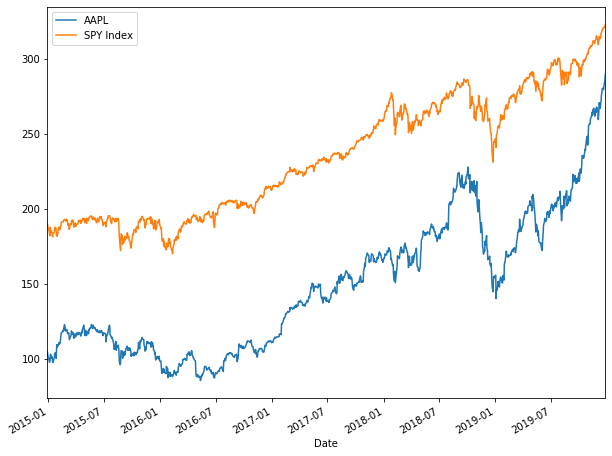

In [10]:
aapl['Close'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

# Compare Cumulative Return

In [12]:
aapl['Cumulative'] = aapl['Close'] / aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

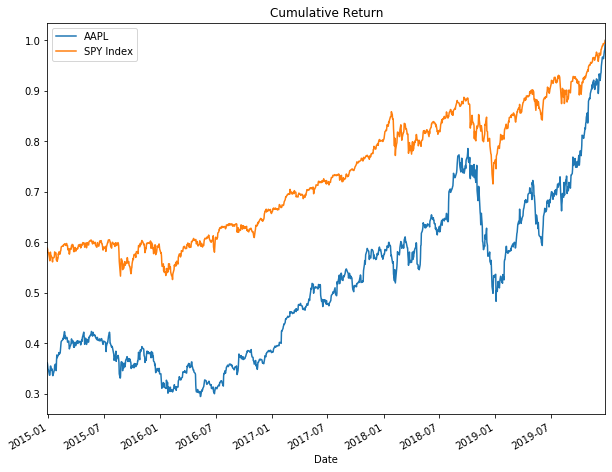

In [13]:
aapl['Cumulative'].plot(label='AAPL', figsize=(10, 8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

### Daily Return

In [14]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

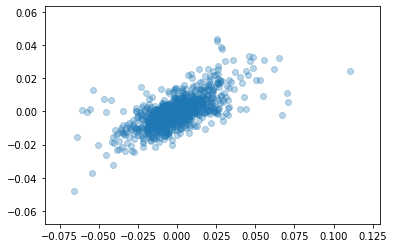

In [15]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

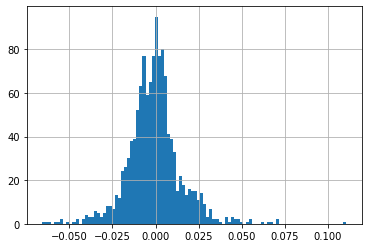

In [16]:
aapl['Daily Return'].hist(bins=100)

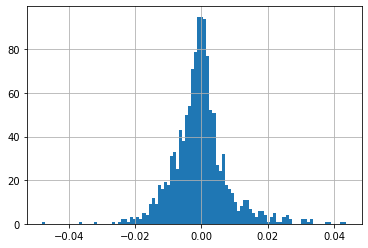

In [17]:
spy_etf['Daily Return'].hist(bins=100)

In [18]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [19]:
beta, alpha, r_value, p_value, std_err

(0.36238088667310625,
 -0.00013689564547963843,
 0.6715034432709125,
 1.405949634600218e-165,
 0.011287927855851988)

### What if our stock was completely related to SP500?

In [20]:
spy_etf['Daily Return'].head()

Date
2019-12-26         NaN
2019-12-24   -0.005295
2019-12-23   -0.000031
2019-12-20   -0.001525
2019-12-19    0.000530
Name: Daily Return, dtype: float64

In [21]:
import numpy as np

In [22]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [23]:
noise

array([-0.00122998,  0.00163576, -0.00097913, ..., -0.00049784,
       -0.00077106,  0.0006687 ])

In [24]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2019-12-24   -0.006525
2019-12-23    0.001605
2019-12-20   -0.002505
2019-12-19    0.000732
2019-12-18   -0.004745
                ...   
2015-01-05    0.008529
2015-01-02    0.016133
2014-12-31    0.000090
2014-12-30    0.009218
2014-12-29    0.005746
Name: Daily Return, Length: 1257, dtype: float64

In [25]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])

In [26]:
beta, alpha

(0.987134631695977, 3.871423246940768e-06)

# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $

### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$